<h3 style="color:red;">Preterm neonate of 31 weeks of gestation and 1.5 kg at 48 hours</h3>

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 2.9 sec. Average model step in 0.0245 ms.
Heart.heart_rate: max      160.0 min      160.0
AA.pres         : max   68.74564, min   48.33597 mmHg
LA_LV.flow      : net  236.70117, forward  236.70117, backward        0.0 ml/kg/min, stroke volume:    1.47937 ml/kg, 
RA_RV.flow      : net  232.97303, forward  232.97303, backward        0.0 ml/kg/min, stroke volume:    1.45607 ml/kg, 
SVC_RA.flow     : net  102.94463, forward  105.89924, backward   -2.95461 ml/kg/min, stroke volume:     0.6434 ml/kg, 
AAR_AD.flow     : net   131.0413, forward  132.21548, backward   -1.17418 ml/kg/min, stroke volume:      0.819 ml/kg, 
LV.vol          : max    2.25091, min    0.77154 ml/kg


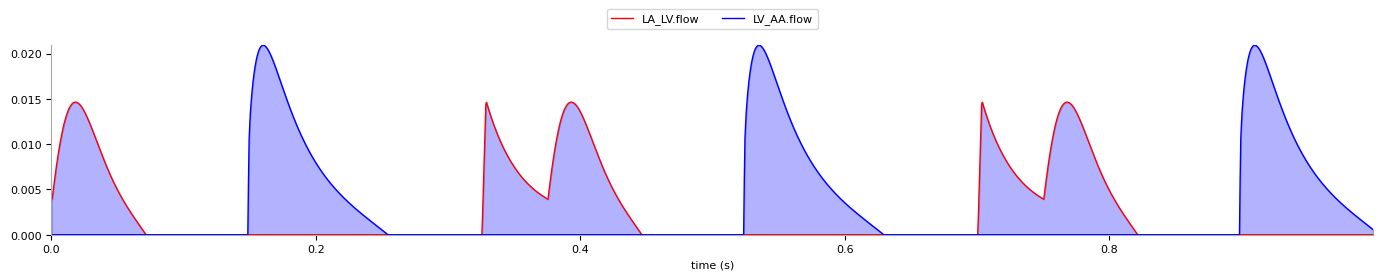

LA_LV.flow      : net  150.05185, forward  150.05185, backward        0.0 ml/min, stroke volume:     0.8332 ml, 
LV_AA.flow      : net  173.09604, forward  173.09604, backward        0.0 ml/min, stroke volume:    0.96116 ml, 


In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(False)
neo.breathing(False)
neo.metabolism(False)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# scale the model to a premature neonate of 31 weeks and 1.5 kg (p50 Fenton growth charts) and recalculate 120 seconds
model._scaling.res_factor_circ_correction = 1.0
model._scaling.el_base_factor_circ_correction = 1.0
model._scaling.el_min_factor_correction = 1.0
model._scaling.el_max_factor_correction = 1.0

model._scaling.scale_patient(
    gest_age=24.0,
    postnatal_age=2.0,
    weight=0.65,
    height=0.309,
    blood_volume=0.08,
    lung_volume=0.03,
    hr_ref=160.0,
    map=34.62,
)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

# get the validation data
neo.validate()
neo.plot_time_graph(
    ["LA_LV.flow", "LV_AA.flow"], sampleinterval=0.0005, time_to_calculate=1.0
)

<h5 style="color:red;">Model run results</h5>

In [ ]:
model._scaling.scale_factor

<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="450"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="450"></img><br>
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img> -->

<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>

In [ ]:
# get additional model data, heartrate and resp_rate in beats and breaths per minute, pressures in mmHg, po2 and pco2 in kPa, hco3 and base excess (be) in mmol/l
neo.get_vitals()

In [ ]:
neo.get_total_blood_volume()

In [ ]:
neo.plot_time_graph(["LV_AA.flow"], sampleinterval=0.0005, time_to_calculate=0.2)